# Aula 1

In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
print(cv2.__version__)
print(pytesseract.__version__)

4.6.0
0.3.10


In [3]:
imagem = cv2.imread('imagens/trecho_livro.png')

In [4]:
def imshow(imagem):
    cv2.imshow("test", imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


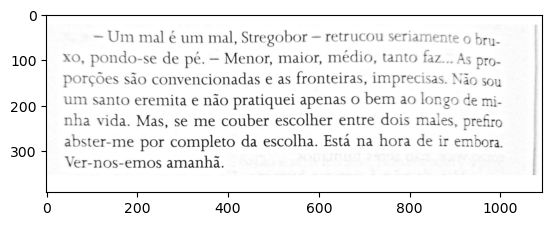

In [5]:
plt.imshow(imagem)

In [6]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. |
Ver-nos-emos amanhã. |



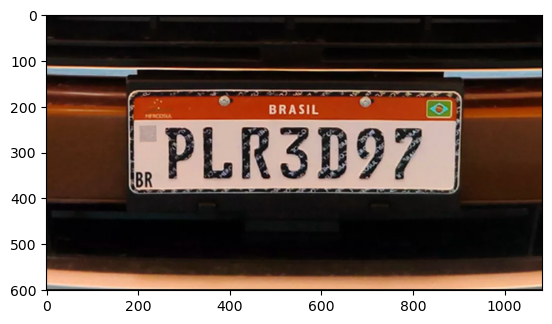

In [7]:
imagem = cv2.imread('imagens/placa_carro1.png')
plt.imshow(imagem)

In [8]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

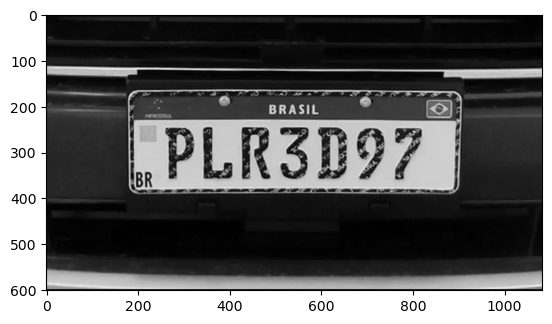

In [9]:
plt.imshow(imagem, cmap='gray')

In [10]:
config_tesseract = '--tessdata-dir tessdata'

texto = pytesseract.image_to_string(imagem, lang='por', config=config_tesseract)
print(texto)

# Aula 2

## Threshold

In [11]:
limiar = 25
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
imshow(lim_simples)

In [12]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
imshow(lim_simples)

In [13]:
lin_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
imshow(lin_adapt)

In [14]:
lin_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
imshow(lin_adapt)

In [15]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

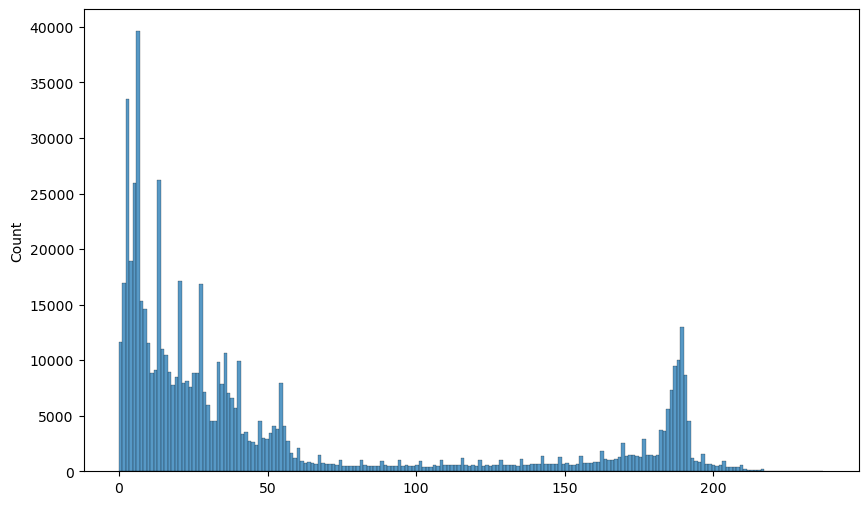

In [16]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(10,6)

In [17]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow(lim_otsu)

In [18]:
print(valor)

96.0


In [19]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

# Aula 3

## Morphology

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [21]:
erosao = cv2.erode(lim_otsu, kernel)
imshow(erosao)

In [22]:
dilatacao = cv2.dilate(lim_otsu, kernel)
imshow(dilatacao)

In [23]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
imshow(abertura)

In [24]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
imshow(fechamento)

In [25]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
imshow(gradiente)

In [26]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
imshow(cartola)

In [27]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
cartola2 = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
imshow(cartola2)

In [28]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
cartola2 = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
imshow(cartola2)

In [29]:
chapeu_preto = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
imshow(chapeu_preto)

In [30]:
chapeu_preto2 = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
imshow(chapeu_preto2)

In [31]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

mee ee EN me S T

EFASIL

PLR3D97



# Aula 4

## bordas e contornos

In [33]:
bordas = cv2.Canny(imagem, 100, 200)
imshow(bordas)

In [36]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [39]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [40]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [41]:
x, y, w, h = cv2.boundingRect(localizacao)

In [46]:
placa = imagem[y:y+h, x:x+w]
imshow(placa)

In [50]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
imshow(erosao)

In [51]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

L PLR3D97



In [52]:
import re

In [54]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)

In [58]:
print(texto_extraido.group(0))

PLR3D97


In [66]:
imagem = cv2.imread('imagens/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

In [67]:
imshow(imagem)

In [68]:
bordas = cv2.Canny(imagem, 100, 200)
imshow(bordas)

In [69]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [71]:
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]

In [72]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [74]:
x, y, w, h = cv2.boundingRect(localizacao)
placa = imagem[y:y+h, x:x+w]
imshow(placa)

In [75]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
imshow(erosao)

In [76]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

“pOX4E21



In [77]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

pOX4E21


# Aula 5

## Reconhecimento automatizado

In [78]:
imagem = cv2.imread('imagens/placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imshow(imagem)

In [79]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))

In [80]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
imshow(chapeu_preto)

### Sobel

In [81]:
import numpy as np
sobel_x = cv2.Sobel(chapeu_preto, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
imshow(sobel_x)

In [82]:
sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x,cv2.MORPH_CLOSE, kernel_retangular)
imshow(sobel_x)

In [83]:
valor, lim = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [84]:
imshow(lim)

In [85]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
lim = cv2.erode(lim, kernel_quadrado, iterations=2)
lim = cv2.dilate(lim, kernel_quadrado, iterations=2)
imshow(lim)

In [86]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow(mascara)

In [87]:
lim = cv2.bitwise_and(lim, lim, mask = mascara)
lim = cv2.dilate(lim, kernel_quadrado, iterations=2)
lim = cv2.erode(lim, kernel_quadrado)
imshow(lim)

In [90]:
from skimage.segmentation import clear_border

In [91]:
lim = clear_border(lim)
imshow(lim)

In [92]:
contornos, hierarquia = cv2.findContours(lim, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [96]:
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]

In [100]:
for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        proporcao = float(w)/h
        if proporcao >=3 and proporcao <= 3.5:
            placa = imagem[y:y+h, x:x+w]
            valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            regiao_interesse = clear_border(regiao_interesse)
            imshow(placa)
            imshow(regiao_interesse)

In [101]:
texto = pytesseract.image_to_string(regiao_interesse, lang = 'por', config = config_tesseract)
print(texto)

.BDM3D69



In [102]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
texto_extraido

<re.Match object; span=(1, 8), match='BDM3D69'>

In [103]:
print(texto_extraido.group(0))

BDM3D69
